The primary aim of this task is twofold: first, to identify and locate the license plates affixed to the vehicles in the images, and second, to perform character recognition on these license plates, deciphering the alphanumeric text they contain.


## 1. License plate detection- Localization
is an object detection task where the objective is to predict the bounding box that surrounds a license plate within an image. The goal is to accurately locate and outline the area where the license plate is present in the image.

#Importing the Google Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprocessing the LicensePlate detection csv data

In [ ]:
# Data preprocessing
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import os

# read annotation file
df = pd.read_csv("/content/drive/MyDrive/Vehicle Task/Licplatesdetection_train.csv")

print(df)



      img_id  ymin  xmin  ymax  xmax
0      1.jpg   276    94   326   169
1     10.jpg   311   395   344   444
2    100.jpg   406   263   450   434
3    101.jpg   283   363   315   494
4    102.jpg   139    42   280   222
..       ...   ...   ...   ...   ...
895   95.jpg   426    34   508   140
896   96.jpg   356   378   457   548
897   97.jpg   229   149   283   217
898   98.jpg   272   252   300   383
899   99.jpg    53   503   217   569

[900 rows x 5 columns]


#Creating the bounding box for each license plate staring with single image

<ipython-input-8-927bf58ebf04>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_min, y_min, x_max, y_max = int(img_bbox["xmin"]), int(img_bbox["ymin"]), int(img_bbox["xmax"]), int(img_bbox["ymax"])


94 276 169 326
(477, 850, 3)


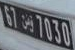

In [ ]:
img_bbox = df.loc[df['img_id']=='1.jpg']
x_min, y_min, x_max, y_max = int(img_bbox["xmin"]), int(img_bbox["ymin"]), int(img_bbox["xmax"]), int(img_bbox["ymax"])
print(x_min, y_min, x_max, y_max)
# plot the bbox and visualize
img = cv2.imread("/content/drive/MyDrive/Vehicle Task/license_plates_detection_train/1.jpg")
print(img.shape) # -> (h, w , 3) ->(BGR)

# crop the region
plate = img[y_min:y_max,  x_min:x_max]
cv2_imshow(plate)
# img[]
#cv2.imshow() - it works in jupyter notebook and local computer

#Resizing the image resolution for all the image data

In [ ]:
# resize imgs to one size (224,224)
import os
new_size = 224
img_top_path = "/content/drive/MyDrive/Vehicle Task/license_plates_detection_train"
preprocessed_imgs = "/content/drive/MyDrive/Vehicle Task/output"
for img_name in os.listdir(img_top_path):
  img_path = os.path.join(img_top_path, img_name)
  img = cv2.imread(img_path)
  print(img.shape) # all the shapes will be different
  h,w,c = img.shape

  #input to my model
  img_resized = cv2.resize(img,(new_size ,new_size))
  cv2.imwrite(f"{preprocessed_imgs}/{img_name}", img_resized )

  # calculate resize ratio
  Rx, Ry = new_size/w, new_size/h
img_bbox = df.loc[df['img_id'] == img_name]
x_min = int(img_bbox["xmin"].iloc[0])
y_min = int(img_bbox["ymin"].iloc[0])
x_max = int(img_bbox["xmax"].iloc[0])
y_max = int(img_bbox["ymax"].iloc[0])


# new bbox position- it has to be in int
x_min, y_min, x_max, y_max = int(Rx*x_min)/new_size, int(Ry*y_min)/new_size, int(Rx*x_max)/new_size, int(Ry*y_max)/new_size

txt_name = img_name.replace(".jpg",".txt") #1.jpg, 1.txt
with open(f"{preprocessed_imgs}/{txt_name}", "a") as F:
  F.write(f"{x_min, y_min, x_max, y_max}\n")






(547, 307, 3)
(547, 729, 3)
(477, 850, 3)
(547, 410, 3)
(477, 850, 3)
(547, 489, 3)
(547, 410, 3)
(547, 307, 3)
(547, 307, 3)
(286, 515, 3)
(547, 729, 3)
(547, 327, 3)
(477, 719, 3)
(444, 410, 3)
(547, 410, 3)
(547, 410, 3)
(479, 359, 3)
(482, 643, 3)
(481, 306, 3)
(477, 850, 3)
(547, 307, 3)
(547, 501, 3)
(547, 306, 3)
(455, 410, 3)
(547, 410, 3)
(547, 733, 3)
(547, 729, 3)
(479, 719, 3)
(479, 359, 3)
(547, 409, 3)
(477, 850, 3)
(547, 410, 3)
(547, 410, 3)
(359, 479, 3)
(507, 729, 3)
(477, 850, 3)
(499, 307, 3)
(477, 850, 3)
(547, 821, 3)
(547, 410, 3)
(547, 729, 3)
(474, 787, 3)
(478, 850, 3)
(477, 850, 3)
(547, 729, 3)
(359, 479, 3)
(547, 729, 3)
(547, 409, 3)
(547, 410, 3)
(547, 410, 3)
(539, 409, 3)
(547, 729, 3)
(477, 850, 3)
(547, 328, 3)
(334, 479, 3)
(479, 799, 3)
(509, 850, 3)
(547, 307, 3)
(477, 850, 3)
(477, 850, 3)
(547, 729, 3)
(547, 410, 3)
(477, 850, 3)
(547, 729, 3)
(479, 287, 3)
(547, 307, 3)
(547, 410, 3)
(547, 729, 3)
(488, 410, 3)
(547, 729, 3)
(547, 729, 3)
(547, 

#Importing the MobileNet Model from Pytorch

In [ ]:
!pip install torchvision==0.9.1


ERROR: Could not find a version that satisfies the requirement torchvision==0.9.1 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0)
ERROR: No matching distribution found for torchvision==0.9.1


In [ ]:
# write your CNN model (mobilenet)
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
print(model.classifier)
model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=4)
print(model.classifier)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 111MB/s] 


Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)
Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=4, bias=True)
)


##creating a data loader and training your model using PyTorch

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define a custom dataset class
class LicensePlateDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_name)
        bbox = self.annotations.iloc[idx, 1:].values.astype(np.float32)
        if self.transform:
            image = self.transform(image)
        return image, bbox

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Initialize dataset and dataloader
dataset = LicensePlateDataset(csv_file='/content/drive/MyDrive/Vehicle Task/Licplatesdetection_train.csv',
                              root_dir='/content/drive/MyDrive/Vehicle Task/license_plates_detection_train',
                              transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Train your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.SmoothL1Loss()

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Save the trained model
torch.save(model.state_dict(), 'license_plate_detection_model.pth')


KeyboardInterrupt: 

# Character segmentation

In [ ]:
# Read the image and convert to grayscale
image = cv2.imread("/content/drive/MyDrive/Vehicle Task/license_plates_recognition_train/0.jpg")
print(image.shape)
# plate = image[y_min:y_max,  x_min:x_max]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)

# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#  cv2.THRESH_BINARY,11,2)


(20, 89, 3)


In [ ]:
cv2_imshow(thresh)

In [ ]:
import numpy as np
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")
# Set lower bound and upper bound criteria for characters
total_pixels = plate.shape[0] * plate.shape[1]
print(total_pixels)
# lower = total_pixels // 100 # heuristic param, can be fine tuned if necessary
# upper = total_pixels //35 # heuristic param, can be fine tuned if necessary
lower = total_pixels // 3 # heuristic param, can be fine tuned if necessary
upper = total_pixels //3 # heuristic param, can be fine tuned if necessary

# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue

    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    # print(numPixels)

    # If the number of pixels in the component is between lower bound and upper bound,
    # add it to our mask
    if numPixels > lower and numPixels < upper:
      mask = cv2.add(mask, labelMask)
cv2_imshow(mask)

3750


In [ ]:
# Find contours and get bounding box for each contour
import functools
import numpy as np
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [ ]:
print(boundingBoxes)
heights = []
widths = []
for box in boundingBoxes:
  x,y,w,h = box
  # cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,0,0),1)
  heights.append(h-y)
  widths.append(w-x)

# find mean, std
h_std = np.std(heights)
w_std  =np.std(widths)
h_mean = np.mean(heights)
w_mean  =np.mean(widths)

# specify cut-off to remove outliers
h_cut_off = h_std * 2
lower_h, upper_h = h_mean - h_cut_off, h_mean + h_cut_off

w_cut_off = w_std * 2
lower_w, upper_w = w_mean - w_cut_off, w_mean + w_cut_off
selected_boxes = []
for i,box in enumerate(boundingBoxes):
  x,y,w,h = box
  print(x,y,w,h)
  # print(abs(h_std - (y+h)), abs(w_std - (x+w)))
  # cv2.putText(mask, str(i), (x,y), 0, 0.8, (255, 0, 0), 1)
  if (((h-y) > lower_h) and ((h-y) < upper_h)) and (((w-x) > lower_w) and ((w-x) < upper_w)):
    selected_boxes.append(box)


for box in selected_boxes:
  x,y,w,h = box
  cv2.rectangle(mask,(x,y),(x+w,y+h),(255,0,0),1)

# cv2.imwrite("thresh.jpg",thresh)
cv2_imshow(mask)

[(0, 1, 52, 18), (8, 7, 1, 1), (13, 4, 4, 13), (20, 4, 3, 12), (25, 1, 1, 1), (26, 3, 5, 13), (30, 1, 1, 1), (35, 13, 4, 1), (38, 8, 6, 4), (41, 5, 1, 2), (42, 8, 7, 7), (47, 5, 1, 2), (52, 3, 6, 13), (57, 0, 32, 18), (59, 3, 5, 13), (59, 0, 2, 1), (62, 0, 1, 1), (64, 0, 1, 1), (65, 3, 6, 13), (66, 0, 1, 1), (68, 0, 8, 1), (72, 3, 6, 13), (54, 17, 1, 1)]
0 1 52 18
8 7 1 1
13 4 4 13
20 4 3 12
25 1 1 1
26 3 5 13
30 1 1 1
35 13 4 1
38 8 6 4
41 5 1 2
42 8 7 7
47 5 1 2
52 3 6 13
57 0 32 18
59 3 5 13
59 0 2 1
62 0 1 1
64 0 1 1
65 3 6 13
66 0 1 1
68 0 8 1
72 3 6 13
54 17 1 1


In [ ]:
import cv2

def resize_with_aspect_ratio(image, width=None, height=None):
    # Get the original image dimensions
    h, w = image.shape[:2]

    # Calculate the aspect ratio
    aspect_ratio = w / h

    if width is None:
        # Calculate height based on the specified width
        new_height = int(height / aspect_ratio)
        resized_image = cv2.resize(image, (height, new_height))
    else:
        # Calculate width based on the specified height
        new_width = int(width * aspect_ratio)
        resized_image = cv2.resize(image, (new_width, width))

    return resized_image

In [ ]:
## Preprocess character images
img_top_path = "/content/drive/MyDrive/Vehicle Task/license_plates_recognition_train"
preprocessed_imgs = "characters_preprocess"
for img_name in os.listdir(img_top_path):
  img_path = os.path.join(img_top_path, img_name)
  img = cv2.imread(img_path)

  # resize with aspect ratio, since width is longer
  img_resized = resize_with_aspect_ratio(img, height=224)
  print(img_resized.shape)



(84, 224, 3)
(164, 224, 3)
(72, 224, 3)
(54, 224, 3)
(27, 224, 3)
(52, 224, 3)
(47, 224, 3)
(47, 224, 3)
(57, 224, 3)
(55, 224, 3)
(35, 224, 3)
(73, 224, 3)
(56, 224, 3)
(56, 224, 3)
(46, 224, 3)
(149, 224, 3)
(52, 224, 3)
(71, 224, 3)
(57, 224, 3)
(37, 224, 3)
(65, 224, 3)
(42, 224, 3)
(61, 224, 3)
(56, 224, 3)
(53, 224, 3)
(247, 224, 3)
(56, 224, 3)
(63, 224, 3)
(105, 224, 3)
(59, 224, 3)
(56, 224, 3)
(98, 224, 3)
(237, 224, 3)
(48, 224, 3)
(52, 224, 3)
(53, 224, 3)
(72, 224, 3)
(75, 224, 3)
(51, 224, 3)
(150, 224, 3)
(120, 224, 3)
(40, 224, 3)
(152, 224, 3)
(57, 224, 3)
(53, 224, 3)
(67, 224, 3)
(58, 224, 3)
(200, 224, 3)
(56, 224, 3)
(70, 224, 3)
(90, 224, 3)
(60, 224, 3)
(69, 224, 3)
(53, 224, 3)
(48, 224, 3)
(42, 224, 3)
(69, 224, 3)
(53, 224, 3)
(40, 224, 3)
(84, 224, 3)
(48, 224, 3)
(37, 224, 3)
(81, 224, 3)
(130, 224, 3)
(177, 224, 3)
(34, 224, 3)
(49, 224, 3)
(57, 224, 3)
(53, 224, 3)
(60, 224, 3)
(149, 224, 3)
(52, 224, 3)
(53, 224, 3)
(91, 224, 3)
(89, 224, 3)
(59, 224, 3)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Vehicle Task/Licplatesrecognition_train.csv")

In [ ]:
chars = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G',
    'H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]

In [ ]:
import matplotlib.pyplot as plt

def segment_characters(image) :
    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Contour')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

In [ ]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            plt.title('Predict Segments')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)

    # Return characters on ascending order with respect to the x-coordinate (most-left character first)

    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

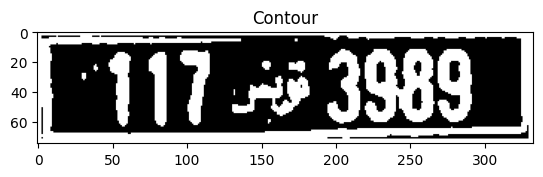

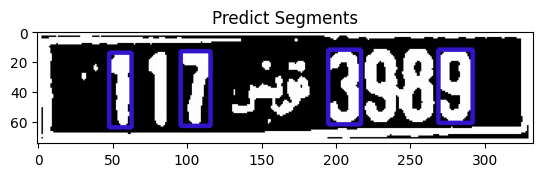

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        ...,
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        ...,
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        ...,
        [  0.,   0., 255., ..., 255.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,

In [ ]:
segment_characters(image)

##The license plates within the images and recognize the characters on those plates are completed
